<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.3 : Padding and Striding

In [1]:
import torch
from torch import nn

In [3]:
a = torch.zeros(3, 3)
a = a.reshape((1, 1) + a.shape)
print(a.shape)

torch.Size([1, 1, 3, 3])


In [4]:
a.reshape(a.shape[2:]).shape

torch.Size([3, 3])

In [5]:
torch.squeeze(a)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [2]:
def comp_conv2d(conv2d, X):
  # (1, 1) --> batch_size and the number of channels both are 1
  X = X.reshape((1, 1) + X.shape)
  Y = conv2d(X)

  # strip the first two dimensions
  return Y.reshape(Y.shape[2:])

In [6]:
nn.LazyConv2d??

In [7]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(8, 8)
comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([8, 8])

In [8]:
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
X = torch.rand(8, 8)
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [9]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [10]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

In [20]:
X = torch.zeros(8, 8)
X[: ,:2] = 1
X[:, 6:8] = 1
print(X) 

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])


In [12]:
import matplotlib.pyplot as plt

In [20]:
plt.imshow??

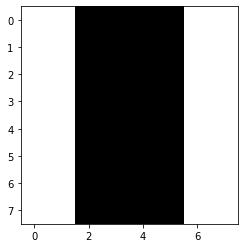

In [21]:
plt.imshow(X, cmap='gray', vmin=0, vmax=1)
plt.show()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


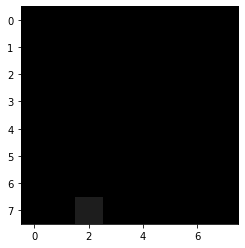

In [22]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=1)
plt.imshow(comp_conv2d(conv2d, X).detach(), cmap='gray', vmin=0, vmax=1);

In [25]:
conv2d.state_dict()

OrderedDict([('weight', tensor([[[[ 0.3079, -0.2372, -0.1248],
                        [ 0.0613,  0.0407, -0.1467],
                        [-0.2379, -0.0597, -0.1709]]]])),
             ('bias', tensor([-0.2551]))])

- when we use smaller strides : it leads to larger overlap and thus output volume is higher. 

- Larger strides lead to less overlap which means lower output volume. It also helps in avoiding overfitting

In [26]:
nn.LazyConv2d??

In [28]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=(1/2, 1/2))
comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


TypeError: ignored